In [220]:
import pandas as pd


In [221]:
df = pd.read_csv("data/jambore_education.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


None of the columns are of object type. So we need not convert any of them before training the model.

In [223]:
df.nunique()

Serial No.           500
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

every column here is measured on different scale. for example sop,lor is rated out of 10, university rating is rated out of 5. Except for the column Research which is a categorical feature where 0 stands for no research experience and 1 for a candidate with research experience

In [224]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

zero null records. wow!! seems like we got a good data. lets check the distribution of the dataset

In [225]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


i feel serial nimber column is of no use as it doesn't describe anything about the student. so let's drop it

In [226]:
df.drop(columns="Serial No.", inplace=True, index=1)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


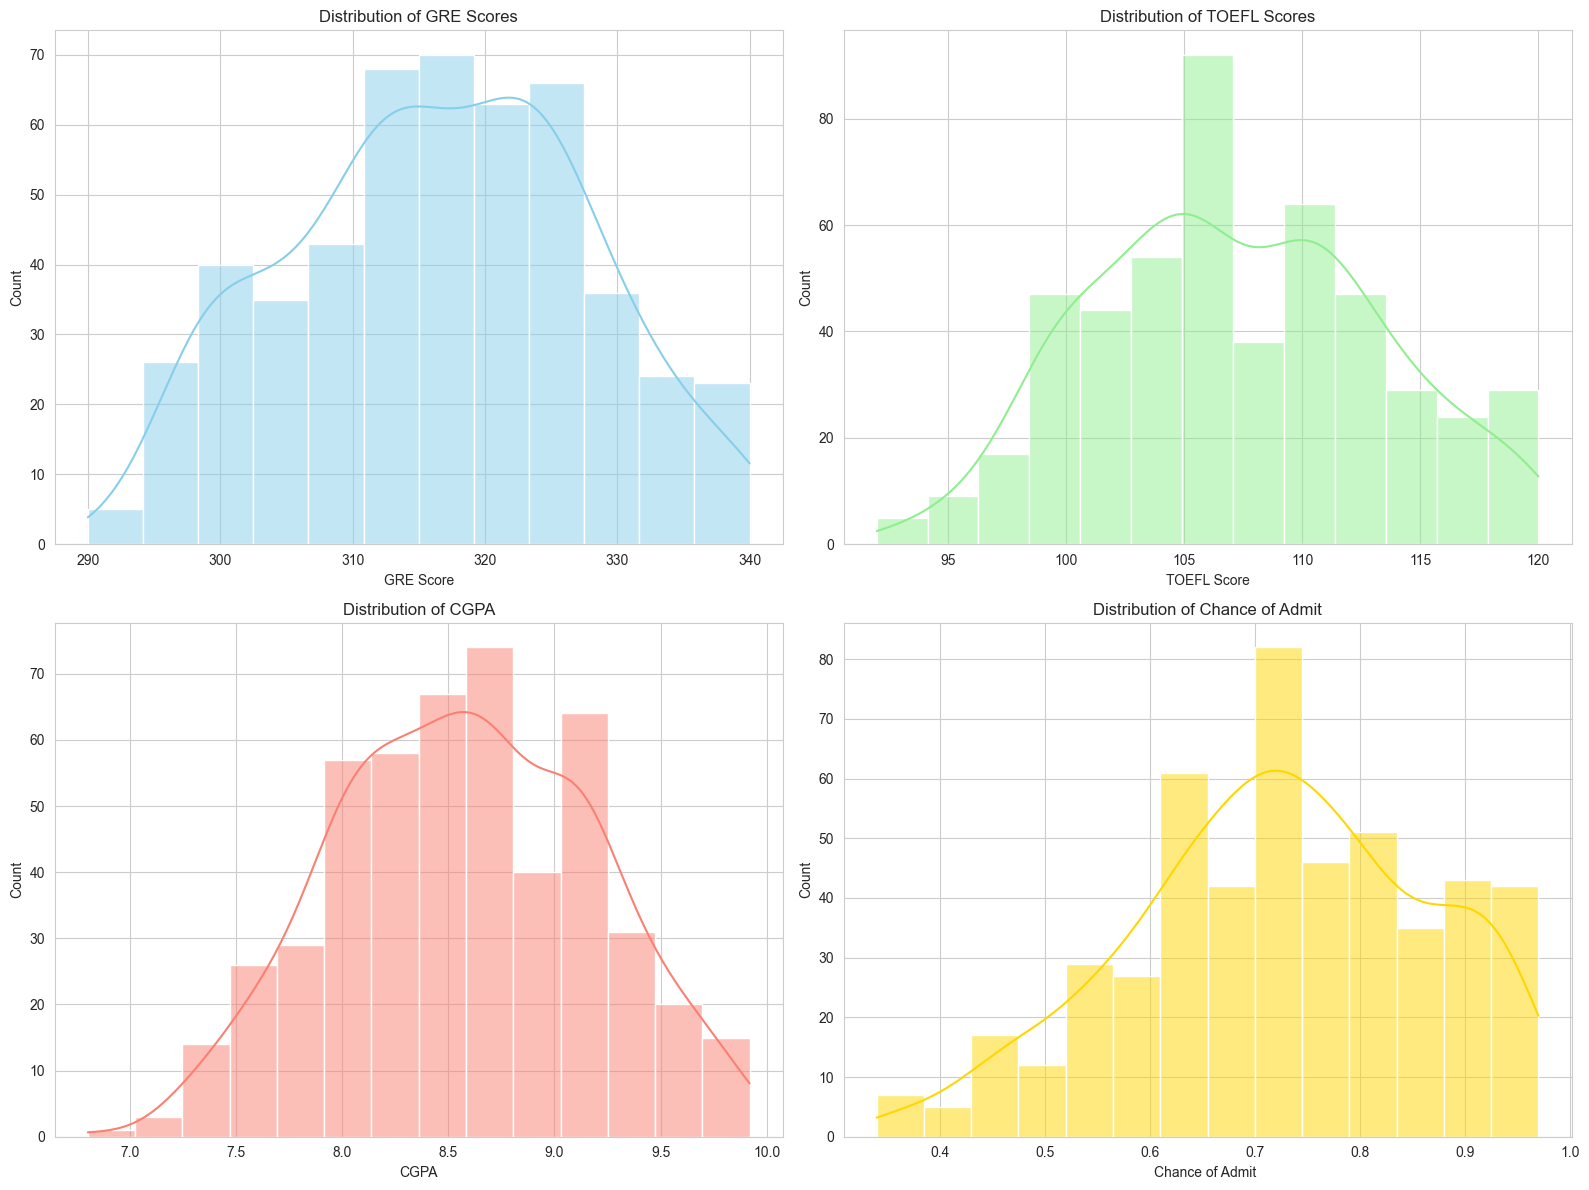

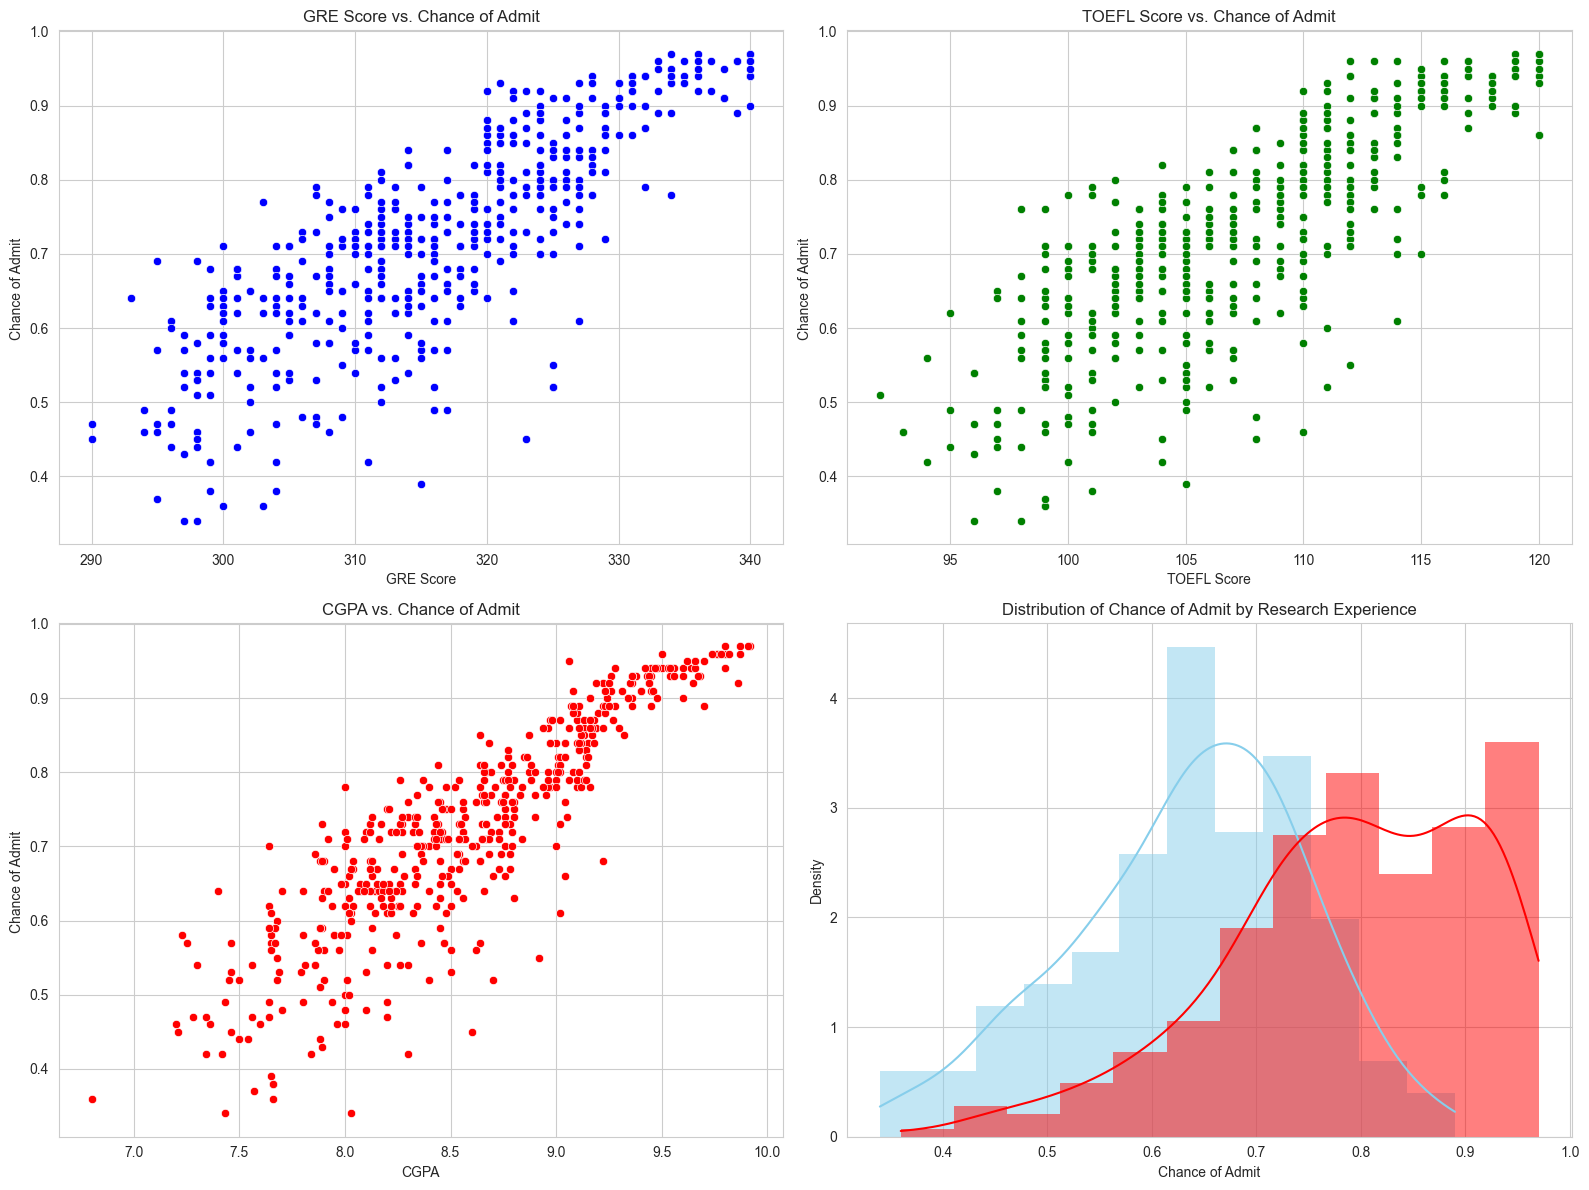

In [227]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Univariate Analysis
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Histograms for continuous variables
sns.histplot(df['GRE Score'], kde=True, ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Distribution of GRE Scores')

sns.histplot(df['TOEFL Score'], kde=True, ax=axs[0, 1], color='lightgreen')
axs[0, 1].set_title('Distribution of TOEFL Scores')

sns.histplot(df['CGPA'], kde=True, ax=axs[1, 0], color='salmon')
axs[1, 0].set_title('Distribution of CGPA')

sns.histplot(df['Chance of Admit '], kde=True, ax=axs[1, 1], color='gold')
axs[1, 1].set_title('Distribution of Chance of Admit')

plt.tight_layout()
plt.show()

# Bivariate Analysis - Select a few key plots to illustrate relationships
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

sns.scatterplot(data=df, x='GRE Score', y='Chance of Admit ', ax=axs[0, 0], color='blue')
axs[0, 0].set_title('GRE Score vs. Chance of Admit')

sns.scatterplot(data=df, x='TOEFL Score', y='Chance of Admit ', ax=axs[0, 1], color='green')
axs[0, 1].set_title('TOEFL Score vs. Chance of Admit')

sns.scatterplot(data=df, x='CGPA', y='Chance of Admit ', ax=axs[1, 0], color='red')
axs[1, 0].set_title('CGPA vs. Chance of Admit')




# Comparing the distribution of Chance of Admit for candidates with and without research experience using histograms
# plt.figure(figsize=(12, 6))

# Candidates without research experience
sns.histplot(df[df['Research'] == 0]['Chance of Admit '], color="skyblue", label='No Research', kde=True, stat="density", linewidth=0)

# Candidates with research experience
sns.histplot(df[df['Research'] == 1]['Chance of Admit '], color="red", label='Research', kde=True, stat="density", linewidth=0)

plt.title('Distribution of Chance of Admit by Research Experience')
plt.xlabel('Chance of Admit')
plt.ylabel('Density')
plt.tight_layout()
plt.show()


all the distributions seems to be more or less normally distributed. and when coming to the bivariate analysis we can that as the scores of any exams are increasing we can see that the chance of admit is increasing as well. 

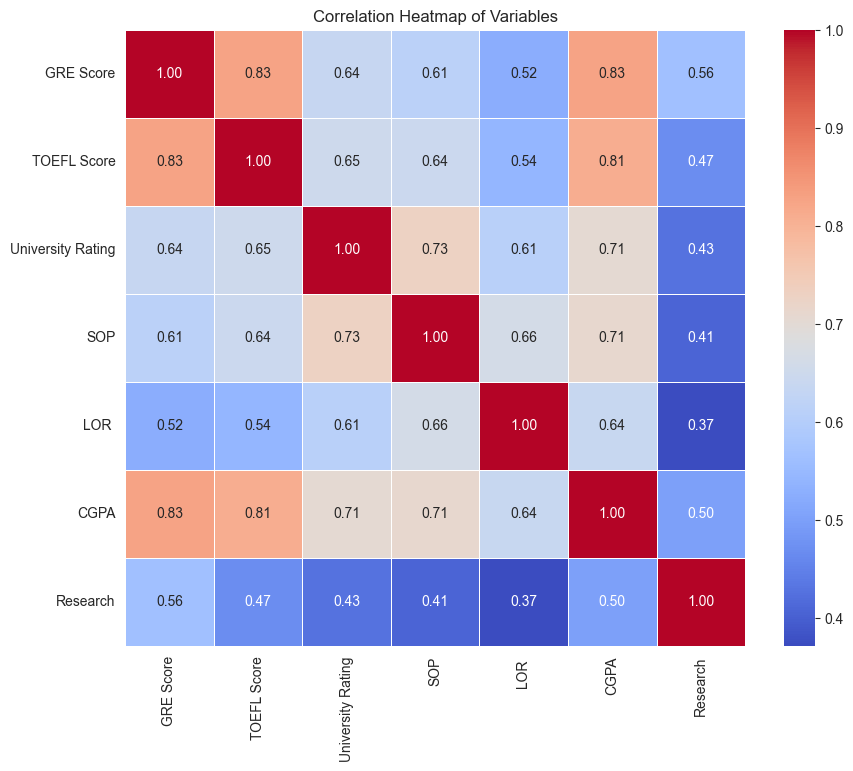

In [228]:
# Calculating the correlation matrix
corr_matrix = df.drop(columns= "Chance of Admit ").corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Variables')
plt.show()


In [229]:
df[df["Chance of Admit "] < 0.5].count()

GRE Score            37
TOEFL Score          37
University Rating    37
SOP                  37
LOR                  37
CGPA                 37
Research             37
Chance of Admit      37
dtype: int64

In [230]:
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame and 'chance_of_admit' is your target variable
# Adjust these as necessary
target_variable = 'Chance of Admit '

# Filter to get the subset with low chance of admit (adjust the threshold as needed)
low_chance_data = df[(df[target_variable] > 0.1) & (df[target_variable] < 0.42)]]  # Example threshold

# Generate synthetic data by adding small variations
# Adjust 'num_samples_to_generate' as needed
num_samples_to_generate = 40
new_samples = []

for _ in range(num_samples_to_generate):
    # Randomly pick a sample from low_chance_data
    sample = low_chance_data.sample(n=1)
    for column in low_chance_data.columns:
        if column != target_variable:
            # Add noise to numeric features; adjust the scale of the noise as needed
            noise = np.random.normal(loc=0, scale=0.01)  # Example noise
            sample[column] += noise
    new_samples.append(sample)

# Concatenate the new samples back to the original dataset
augmented_data = pd.concat([df] + new_samples, ignore_index=True)

# Now augmented_data has more examples in the low chance of admit range


SyntaxError: unmatched ']' (276735843.py, line 8)

In [ ]:


# Assuming 'data' is your DataFrame and 'chance_of_admit' is your target variable
# Adjust these as necessary
target_variable = 'Chance of Admit '

# Filter to get the subset with low chance of admit (adjust the threshold as needed)
low_chance_data = augmented_data[(augmented_data[target_variable] > 0.42) & (augmented_data[target_variable] < 0.6)]  # Example threshold

# Generate synthetic data by adding small variations
# Adjust 'num_samples_to_generate' as needed
num_samples_to_generate = 20
new_samples = []

for _ in range(num_samples_to_generate):
    # Randomly pick a sample from low_chance_data
    sample = low_chance_data.sample(n=1)
    for column in low_chance_data.columns:
        if column != target_variable:
            # Add noise to numeric features; adjust the scale of the noise as needed
            noise = np.random.normal(loc=0, scale=0.01)  # Example noise
            sample[column] += noise
    new_samples.append(sample)

# Concatenate the new samples back to the original dataset
augmente_data = pd.concat([augmented_data] + new_samples, ignore_index=True)

# Now augmented_data has more examples in the low chance of admit range


      GRE Score  TOEFL Score  University Rating      LOR       CGPA  Research
0    337.000000   118.000000           4.000000  4.500000  9.650000  1.000000
1    316.000000   104.000000           3.000000  3.500000  8.000000  1.000000
2    322.000000   110.000000           3.000000  2.500000  8.670000  1.000000
3    314.000000   103.000000           2.000000  3.000000  8.210000  0.000000
4    330.000000   115.000000           5.000000  3.000000  9.340000  1.000000
..          ...          ...                ...       ...       ...       ...
794  305.011837   101.989798           2.003471  2.490008  8.170407  0.002665
795  303.005048    97.988893           1.005318  2.512329  7.645490  0.008883
796  310.996003   104.005175           3.005130  2.015749  8.199316  1.012028
797  297.004413   100.994014           3.005224  3.995418  7.657722  1.023849
798  299.986587    99.989742           2.999301  3.500656  8.263910  0.017310

[799 rows x 6 columns]


0      0.92
1      0.72
2      0.80
3      0.65
4      0.90
       ... 
794    0.62
795    0.56
796    0.61
797    0.57
798    0.62
Name: Chance of Admit , Length: 799, dtype: float64

In [ ]:
augmented_data[augmented_data["Chance of Admit "] < 0.5].count()

GRE Score            237
TOEFL Score          237
University Rating    237
SOP                  237
LOR                  237
CGPA                 237
Research             237
Chance of Admit      237
dtype: int64

In [ ]:


# Assuming 'data' is your DataFrame and 'chance_of_admit' is your target variable
# Adjust these as necessary
target_variable = 'Chance of Admit '

# Filter to get the subset with low chance of admit (adjust the threshold as needed)
low_chance_data = augmente_data[(augmente_data[target_variable] > 0.6) & (augmente_data[target_variable] < 0.7)]  # Example threshold

# Generate synthetic data by adding small variations
# Adjust 'num_samples_to_generate' as needed
num_samples_to_generate = 10
new_samples = []

for _ in range(num_samples_to_generate):
    # Randomly pick a sample from low_chance_data
    sample = low_chance_data.sample(n=1)
    for column in low_chance_data.columns:
        if column != target_variable:
            # Add noise to numeric features; adjust the scale of the noise as needed
            noise = np.random.normal(loc=0, scale=0.01)  # Example noise
            sample[column] += noise
    new_samples.append(sample)

# Concatenate the new samples back to the original dataset
augmentef_data = pd.concat([augmente_data] + new_samples, ignore_index=True)

# Now augmented_data has more examples in the low chance of admit range

X = augmentef_data.drop(columns=["Chance of Admit ", "SOP"])
Y = augmentef_data["Chance of Admit "]
print(X)
Y

In [ ]:
x_train , x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2, shuffle=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

x_train_columns = x_train.columns
std = StandardScaler()
x_train_std = std.fit_transform(x_train)
x_train_std

array([[-1.08908405, -1.2524812 ,  0.215268  ,  0.39298191, -0.9432697 ,
        -0.87047798],
       [-0.66535329, -0.274891  ,  1.9822317 ,  0.92449228,  0.55157032,
        -0.87174082],
       [ 2.04755291,  2.1715074 ,  1.9822317 ,  1.99687639,  1.9256323 ,
         1.14644252],
       ...,
       [-0.91968825, -0.92726391,  0.20563614, -1.22027593,  0.25823124,
         1.14644252],
       [ 0.35168404, -1.0903039 , -1.5921203 , -1.22370774, -1.33315019,
        -0.88939133],
       [-0.07190506, -0.92726391, -0.68266164, -0.14789182, -0.467397  ,
        -0.87174082]])

In [ ]:
X_train = pd.DataFrame(x_train_std, columns=x_train_columns)
X_train

,GRE Score,TOEFL Score,University Rating,LOR,CGPA,Research
0,-1.089084,-1.252481,0.215268,0.392982,-0.943270,-0.870478
1,-0.665353,-0.274891,1.982232,0.924492,0.551570,-0.871741
2,2.047553,2.171507,1.982232,1.996876,1.925632,1.146443
3,0.267208,-0.764171,-1.570959,-0.684084,-0.513714,-0.871741
4,-0.240019,-0.764167,-0.685185,-0.147990,-0.278268,-0.847323
...,...,...,...,...,...,...
634,0.352443,-1.090614,-1.582288,-1.226286,-1.307269,-0.876213
635,0.945032,0.540461,0.187769,-0.153562,0.511013,-0.895490
636,-0.919688,-0.927264,0.205636,-1.220276,0.258231,1.146443
637,0.351684,-1.090304,-1.592120,-1.223708,-1.333150,-0.889391


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.metrics import mean_squared_error

models = [
           ['Linear Regression :', LinearRegression()],

          ['Lasso Regression :', Lasso(alpha=0.1)], #try with different alpha values
          ['Ridge Regression :', Ridge(alpha=1.0)] #try with different alpha values
          ]

print("Results without removing features with multicollinearity ...")


for name,model in models:
    model.fit(X_train, y_train.values)
    predictions = model.predict(std.transform(x_test))
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

    #ADD MAPE

Results without removing features with multicollinearity ...
Linear Regression : 0.07226352744561736
Lasso Regression : 0.1283592693800649
Ridge Regression : 0.07226794299335355


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


In [ ]:
for actual, predicted in zip(y_test, predictions):
    print(f'Actual: {actual} - Predicted: {predicted}')


Actual: 0.66 - Predicted: 0.692653101335369
Actual: 0.68 - Predicted: 0.6219509393303159
Actual: 0.68 - Predicted: 0.5632615199715193
Actual: 0.63 - Predicted: 0.5778345021458253
Actual: 0.42 - Predicted: 0.515617602816668
Actual: 0.47 - Predicted: 0.46617234546893993
Actual: 0.44 - Predicted: 0.46302363688097553
Actual: 0.91 - Predicted: 0.9135177623419479
Actual: 0.7 - Predicted: 0.6679925748972468
Actual: 0.75 - Predicted: 0.7325887259121346
Actual: 0.8 - Predicted: 0.8220013356728925
Actual: 0.42 - Predicted: 0.5967518261087256
Actual: 0.67 - Predicted: 0.7021308973425169
Actual: 0.93 - Predicted: 0.9567654620698742
Actual: 0.54 - Predicted: 0.4853089336037696
Actual: 0.83 - Predicted: 0.8204097479629036
Actual: 0.68 - Predicted: 0.6658098038540894
Actual: 0.63 - Predicted: 0.7205547749850552
Actual: 0.76 - Predicted: 0.7746118920166729
Actual: 0.79 - Predicted: 0.7770761473374079
Actual: 0.71 - Predicted: 0.707512099089554
Actual: 0.54 - Predicted: 0.6030943120594718
Actual: 0.56 

Text(0, 0.5, 'y_pred')

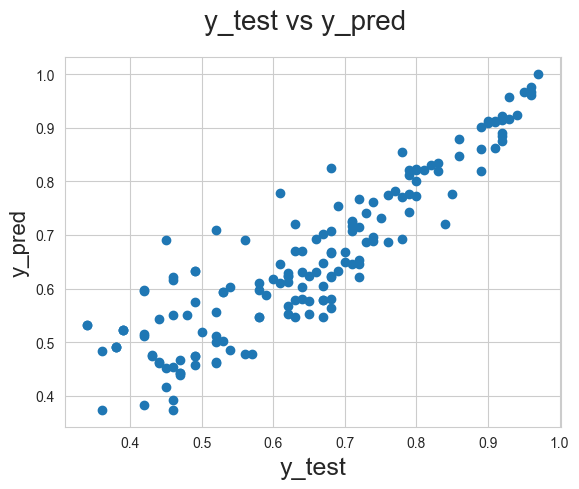

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test.values, predictions)

fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)     